In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import re
from time import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn

In [2]:
%store -r all_tweets

/opt/anaconda3/lib/python3.8/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [3]:
all_tweets.head(3)

,index,date,tweet,language,user_id_str,username,docs,lemmatization,s_token,token,vader_tweets,sentiment
0,0.0,2020-10-24,chikooslim i was thinking that since it was t...,en,18491914,slattfri,"( , chikooslim, i, was, thinking, that, since,...",chikooslim I be think that since it be the d...,"[chikooslim, I, be, think, that, since, it, be...","[chikooslim, I, think, since, daughter, refuse...",chikooslim I think since daughter refuse I ima...,Negative
1,1.0,2020-10-24,he s been saying that for four years alllies...,en,46384399,francesmiddlet2,"(he, s, been, saying, that, for, four, years, ...",he s be say that for four year alllie tru...,"[he, s, be, say, that, for, four, year, alllie...","[say, four, year, alllie, trumplie, time, narc...",say four year alllie trumplie time narcissist ...,Neutral
2,2.0,2020-10-24,incredibly thought provoking article make sur...,en,2902130034,mfly1971,"(incredibly, thought, provoking, article, , m...",incredibly think provoke article make sure y...,"[incredibly, think, provoke, article, make, su...","[incredibly, think, provoke, article, make, su...",incredibly think provoke article make sure rea...,Neutral


Text(0.5, 1.0, 'Perplexity analysis of number of topics')

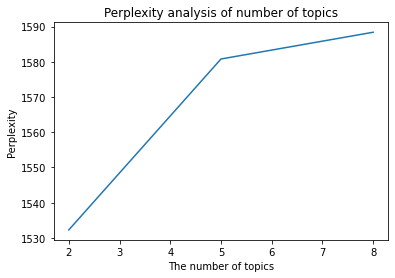

In [5]:
#Selecting number of topics with perplexity
perplexes = []
vectorizer = CountVectorizer(stop_words='english',
                             min_df = 3,
                             strip_accents='unicode')
corpus = vectorizer.fit_transform(all_tweets['vader_tweets'])
for i in range(2,10,3):
    model = LatentDirichletAllocation(n_components=i, 
                                      max_iter=25, 
                                      random_state=123,
                                      n_jobs=-1)
    model.fit(corpus)
    perplexes.append(model.perplexity(corpus, sub_sampling=True))
plt.plot(range(2,10,3), perplexes)
plt.xlabel('The number of topics')
plt.ylabel('Perplexity')
plt.title('Perplexity analysis of number of topics')
plt.savefig('plots/perplexity of the number of topics')

In [6]:
# Setting up our pipeline
model = Pipeline([('count', CountVectorizer(stop_words='english',
                                            min_df=3,
                                            strip_accents='unicode')),
                  ('lda', LatentDirichletAllocation(n_components=4, 
                                                    max_iter=50, 
                                                    random_state=123, 
                                                    n_jobs=-1))])
model.fit(all_tweets['vader_tweets'])

Pipeline(steps=[('count',
                 CountVectorizer(min_df=3, stop_words='english',
                                 strip_accents='unicode')),
                ('lda',
                 LatentDirichletAllocation(max_iter=50, n_components=4,
                                           n_jobs=-1, random_state=123))])

In [8]:
#Displaying topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx+1), end = ' ')
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(model=model.named_steps['lda'], 
               feature_names=model.named_steps['count'].get_feature_names(),
               no_top_words=20)

Topic 1: joebiden biden trump kamalaharris news hunter cnn say joe amp twitter medium watch video tweet thank like know fake fox
Topic 2: biden trump president win joe realdonaldtrump say elect think year make like harris want obama people good know pay na
Topic 3: election vote trump biden state win ballot count voter day bidenharris result poll electionday make amp mail voting fraud georgia
Topic 4: trump election people realdonaldtrump vote like supporter say amp know america lie lose covid think right donald gop president american


In [9]:
# Setting up our pipeline
model = Pipeline([('count', CountVectorizer(stop_words='english',
                                            min_df=3,
                                            strip_accents='unicode')),
                  ('lda', LatentDirichletAllocation(n_components=3, 
                                                    max_iter=50, 
                                                    random_state=123, 
                                                    n_jobs=-1))])
model.fit(all_tweets['vader_tweets'])

Pipeline(steps=[('count',
                 CountVectorizer(min_df=3, stop_words='english',
                                 strip_accents='unicode')),
                ('lda',
                 LatentDirichletAllocation(max_iter=50, n_components=3,
                                           n_jobs=-1, random_state=123))])

In [12]:
#Displaying topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx+1), end = ' ')
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(model=model.named_steps['lda'], 
               feature_names=model.named_steps['count'].get_feature_names(),
               no_top_words=20)

Topic 1: trump joebiden biden supporter like say joe kamalaharris realdonaldtrump news know medium lie hunter rally amp cnn watch tweet twitter
Topic 2: trump biden president realdonaldtrump people win say joe like think year amp want make know donald lose america covid country
Topic 3: election vote trump biden win state ballot voter day count fraud bidenharris result poll amp make electionday mail voting time
